In [92]:
import json
import spacy
import re

from tqdm import tqdm_notebook
import pandas as pd 

from collections import Counter

import matplotlib.pyplot as plt

from numpy.random import rand

from random import sample

In [93]:
import seaborn as sns

In [94]:
nlp = spacy.load('en')

In [95]:
f = open('all_wrong.txt','rt')
all_wrong = f.readlines()
f.close()

In [96]:
f = open('bert_wrong.txt','rt')
bert_wrong = f.readlines()
f.close()

In [97]:
f = open('doc_wrong.txt','rt')
doc_wrong = f.readlines()
f.close()

In [98]:
def removen(file):
    return [line.rstrip('\n') for line in file]

In [99]:
all_wrong = removen(all_wrong)
bert_wrong = removen(bert_wrong)
doc_wrong = removen(doc_wrong)

In [100]:
all_wrong = set(all_wrong)
bert_wrong = set(bert_wrong)
doc_wrong = set(doc_wrong)

In [101]:
rc_wrong = bert_wrong | doc_wrong

In [102]:
both_wrong = bert_wrong & doc_wrong

In [103]:
wrong_docqa = doc_wrong

In [104]:
wrong_bert = bert_wrong

In [105]:
len(bert_wrong), len(doc_wrong)

(2945, 2959)

In [106]:
len(rc_wrong), len(both_wrong)

(4010, 1894)

In [107]:
with open("trivia-qa/wikipedia-dev.json", "r") as f:
    dev = json.load(f)

In [108]:
with open("trivia-qa/wikipedia-train.json", "r") as f:
    train = json.load(f)

In [109]:
with open("trivia-qa/verified-wikipedia-dev.json", "r") as f:
    veri_dev = json.load(f)

In [110]:
dev = dev['Data']

In [111]:
#dev = veri_dev

In [112]:
f = open("trivia-qa/bert-large-qa_ensemble_form-dev.csv", "r")
bert = pd.read_csv(f)

In [113]:
f = open("trivia-qa/docqa_dev_paragraph-output.csv", "r")
docqa = pd.read_csv(f)

In [114]:
docqa

,doc_id,n_answers,para_end,para_start,predicted_end,predicted_score,predicted_start,question_id,rank,text_answer,text_em,text_f1
0,Sasquatch! Music Festival,0,1599,800,1124,-0.643988,1123,wh_3810,2,*Dyme Def,0.0,0.0
1,List of dialling codes in Germany,0,3994,3194,335,-6.600492,335,bb_190,5,Bad,0.0,0.0
2,List of dialling codes in Germany,0,4792,3994,1031,-4.585421,1031,bb_190,6,Drognitz,0.0,0.0
3,List of islands in the Mediterranean,1,798,0,680,6.828997,680,wh_289,3,Sicily,1.0,1.0
4,List of dialling codes in Germany,0,7168,6368,404,-5.945036,404,bb_190,9,Hetzdorf,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
78159,David Lynch,0,3,0,3,-8.975462,2,dpql_263,2,redirectDavid Lynch,0.0,0.0
78160,Toyota Corolla,0,3,0,3,-3.694097,2,sfq_11909,0,redirectToyota Corolla,0.0,0.4
78161,Lassie,0,1547,1544,3,-12.918907,3,jp_1303,2,Party,0.0,0.0
78162,Macular degeneration,0,4590,4588,2,-13.325487,1,sfq_9413,10,*Rosanne Barr,0.0,0.0


In [115]:
docqa_prediction = dict()
for key, row in docqa.iterrows():
    if row['rank'] == 0:
        docqa_prediction[row['question_id']] = row['text_answer']

In [116]:
bert_prediction = dict()
bert_probability = dict()
for key, row in bert.iterrows():
    if row['qid'] not in bert_prediction:
        bert_prediction[row['qid']] =  row['answer']
        bert_probability[row['qid']] =  row['probability']
    
    else:
        if bert_probability[row['qid']] < row['probability']:
            bert_prediction[row['qid']] =  row['answer']
            bert_probability[row['qid']] =  row['probability']

In [26]:
len(wrong_howmany_id)

NameError: name 'wrong_howmany_id' is not defined

In [217]:
same_wrong = 0
for instance in dev:
    if instance['QuestionId'] in wrong_when_id:
        if (instance['QuestionId'] in bert_prediction) and (instance['QuestionId'] in docqa_prediction):
            same_wrong += 1
        print("* qid: ", instance['QuestionId'])
        print("* document","/".join([file['Title'] for file in instance['EntityPages']]))
        print("* question: ", instance['Question'])
        print("* answer: ", instance['Answer']['Value'])
        if instance['QuestionId'] in bert_prediction:
            print("* prediction_bert: ", bert_prediction[instance['QuestionId']])
        else: 
            print("* prediction_bert: not predicted")
        
        if instance['QuestionId'] in docqa_prediction:
            print("* prediction_docqa: ", docqa_prediction[instance['QuestionId']])
        else:
            print("* prediction_docqa: not predicted")
            
        print("\n\n")

* qid:  tc_2930
* document Ovary
* question:  When the egg is released from the ovary, what is left behind?
* answer:  Corpus luteum
* prediction_bert:  nut
* prediction_docqa:  testes



* qid:  qb_6386
* document Superstition
* question:  According to British superstition, ‘Marry in ‘when’ and you’ll live to rue the day’?
* answer:  May
* prediction_bert:  today
* prediction_docqa:  church



* qid:  dpql_3210
* document LGBT
* question:  When people talk about LGBT rights, what does the ‘T’ represent?
* answer:  TRANSGENDER
* prediction_bert:  lesbian
* prediction_docqa:  gay community



* qid:  bb_5147
* document Shoaling and schooling
* question:  Technically a shoal of fish becomes a school of fish when it is?
* answer:  Swimming in the same direction
* prediction_bert: not predicted
* prediction_docqa:  schooling



* qid:  qw_5588
* document Labour Day
* question:  When is Labour Day in the USA, Bermuda and Canada?
* answer:  The first Monday in September
* prediction_bert:  1

In [ ]:
print(same_wrong/len(wrong_howmany_id)*100)

In [ ]:
len_of_answer = []
len_of_answer2 = []
known = 0
for instance in dev:
    if instance['QuestionId'] in how_id:
        print("* question: ", instance['Question'])
        print("* answer: ", instance['Answer']['Value'])
        if ("known" in instance['Question'].split()[-1]):
            known+=1
        len_of_answer.append(len(instance['Answer']['Value']))
        len_of_answer2.append(len(instance['Answer']['Value'].split()))
        if instance['QuestionId'] in bert_prediction:
            print("* prediction_bert: ", bert_prediction[instance['QuestionId']])
        else: 
            print("* prediction_bert: not predicted")
        
        if instance['QuestionId'] in docqa_prediction:
            print("* prediction_docqa: ", docqa_prediction[instance['QuestionId']])
        else:
            print("* prediction_docqa: not predicted")
            
        print("\n\n")

In [74]:
sum(len_of_answer)/len(how_id)

10.209302325581396

In [76]:
sum(len_of_answer2)/len(how_id)

1.8372093023255813

In [79]:
known/len(how_id)*100

48.837209302325576

In [97]:
for instance in dev:
    if instance['QuestionId'] in wrong_howmany_id:
        print("* question: ", instance['Question'])
        print("* answer: ", instance['Answer']['Value'])
        if instance['QuestionId'] in bert_prediction:
            print("* prediction_bert: ", bert_prediction[instance['QuestionId']])
        else: 
            print("* prediction_bert: not predicted")
        
        if instance['QuestionId'] in docqa_prediction:
            print("* prediction_docqa: ", docqa_prediction[instance['QuestionId']])
        else:
            print("* prediction_docqa: not predicted")
            
        print("\n\n")

* question:  How many scottish football league teams names end in United?
* answer:  3
* prediction_bert:  ten
* prediction_docqa:  4



* question:  How many episodes of Prisoner: Cell Block H were made?
* answer:  692
* prediction_bert: not predicted
* prediction_docqa:  16





In [26]:
all_qid = []

In [27]:
for instance in dev:
    all_qid.append(instance['QuestionId'])

In [28]:
right_qid = set(all_qid)-set(all_wrong)

In [25]:
len(right_qid), len(all_wrong)

(6146, 1847)

In [26]:
'sfq_14658' in doc_wrong

True

In [27]:
dev[0]

{'Answer': {'Aliases': ['Sunset Blvd',
   'West Sunset Boulevard',
   'Sunset Boulevard',
   'Sunset Bulevard',
   'Sunset Blvd.'],
  'MatchedWikiEntityName': 'Sunset Boulevard',
  'NormalizedAliases': ['sunset boulevard',
   'sunset bulevard',
   'west sunset boulevard',
   'sunset blvd'],
  'NormalizedMatchedWikiEntityName': 'sunset boulevard',
  'NormalizedValue': 'sunset boulevard',
  'Type': 'WikipediaEntity',
  'Value': 'Sunset Boulevard'},
 'EntityPages': [{'DocSource': 'TagMe',
   'Filename': 'Andrew_Lloyd_Webber.txt',
   'Title': 'Andrew Lloyd Webber'}],
 'Question': 'Which Lloyd Webber musical premiered in the US on 10th December 1993?',
 'QuestionId': 'tc_33',
 'QuestionSource': 'http://www.triviacountry.com/'}

In [28]:
print(sample(rc_wrong,20)) 

['sfq_16169', 'bb_8821', 'bt_2646', 'bb_2997', 'qw_15378', 'qw_15940', 'sfq_6452', 'sfq_10502', 'qw_1212', 'sfq_14777', 'jp_3355', 'jp_2757', 'bt_1031', 'qz_1230', 'qw_6358', 'qf_1414', 'qg_1921', 'qw_8714', 'bt_4062', 'qb_7482']


In [29]:
'tc_2699' in all_wrong

True

In [30]:
'tc_2699' in right_qid

False

In [117]:
def clearquestion(question):
    '''
    Clear the query if it contain unnecessary multiple quotes marks
    e.g) "What is the Milky Way?" --> What is the Milky Way?
    @param question
         	query string

    @return the cleaned setence
    '''
    
    if (question.startswith("\"") and question.endswith("\"")) or (question.startswith("\'") and question.endswith("\'")):
        question = question[1:-1]
        question = changepartsent("\"\"", "\"", question)
    
    return question

In [118]:
def changepartsent(word, reword, sentence):
    '''
    Change the part of sentence from word to reword
    @param word
         	@word that targeted to change
    @param reword
         	@word in sentence is replaced to @reword
    @param sentence
         	sentence string
    @return the changed string
    '''
    
    if type(word) is list:
        for w in word:
            sentence = sentence.replace(w,reword)

    else:
        sentence = sentence.replace(word,reword)
        sentence = sentence.replace(word[0].upper()+word[1:],reword)
    
    return sentence

In [158]:
candidate = ['when', 'how', 'where','what', 'which', 'who', 'how many', 'whose', 'whom', 'why']
how_words = ['many','tall','much','tall','old', 'often', 'deep', 'high', 'long', 'far', 'wide']
changelist = ['(what?)', '(what)', '(which?)', '(Which?)', '(which)', '(Which)']

In [218]:
wh_correct = {'tc_1468': 'none',
'tc_2090' :'who',
'qz_3320' :'none',
'qz_5487' :'what',
'qb_870' :'which',
'dpql_3976' :'how',
'wh_3910' :'which',
'bb_981' :'which',
'qw_1543' :'what',
'qw_3547' :'what',
'qw_5761' :'which',
'qw_9073' :'what',
'qw_13617' :'who',
'jp_2802' :'what',
'sfq_3556' :'none',
'sfq_11066' :'what',
'sfq_16328' :'which',
'sfq_17026' :'which',
'sfq_23865' :'which',
'odql_8345' :'who',
'odql_13281' :'who',
'odql_13821' :'who',
'odql_14537' :'what',
'bt_2301' :'which',
'bt_3655' :'who',
'qg_527' :'what',
'qg_1341' :'who',
'odql_3893': 'who',
'tc_2930': 'what',
'dpql_3210': 'what',
'qw_13372': 'what',
'sfq_2805': 'what',
'sfq_4354': 'who',
'sfq_6142': 'what',
'sfq_6452': 'which',
'sfq_8650': 'which',
'odql_465': 'who',
'odql_3893': 'which',
'odql_11176': 'which'}

## WH type wrong probability

In [219]:
def _wh_helper(sentence):
    doc = nlp(sentence)
    
    if sentence.startswith('name'): 
        return 'what'
        #return 'name'
    
    if 'how' in sentence.split():
        list_of_words = sentence.split()
        if list_of_words.index('how') != len(list_of_words)-1: 
            next_word = list_of_words[list_of_words.index('how') + 1]
            if next_word.lower() in how_words:
                return 'how many'
    
    for w in reversed(doc):
        if w.pos_ == 'NN': continue
        else:
            for can in candidate:
                if can in w.text.split():
                    return can
            break
    
    whs = []

    for idx, token in enumerate(doc):
        for can in candidate:
            if can in token.text.split():
                return can
            
    if doc[-1].lemma_ == 'be' or doc[-1].pos_ == 'ADP':
        return 'none'
        #return 'implicit_what'
    
    if 'name' in sentence.lower():
        return 'what'
        #return 'name'
    
    return 'none'

In [220]:
def findWHword(sentence, qid):
    
    if qid in wh_correct:
        return wh_correct[qid]
    
    sentence = sentence.lower()
    osentence = sentence
    
    x = re.findall("\(wha.*?\)", sentence)

    if x != []:
        return 'none'
        #return 'cloze'
    
    if sentence.count('\"') > 0:
        sentence = changepartsent(re.findall(r'"([^"]*)"', sentence), 'QUOTES', sentence)
    if (sentence.count('\'')-sentence.count('\'s')) % 2 == 0 and sentence.count('\'')-sentence.count('\'s') > 0:
        sentence = changepartsent(re.findall(r"'(.*?)'", sentence), 'QUOTES', sentence)
        
    sentence = re.sub('\,.+?\,', '', sentence)
        
    wh = _wh_helper(sentence)
    if wh == 'none':
        wh = _wh_helper(osentence)
    
    return wh

In [221]:
candidate = ['when', 'how', 'where', 'which', 'what', 'who', 'how many', 'whose', 'whom', 'why']

In [246]:
whtype_dict = dict()

for can in candidate:
    whtype_dict[can] = []
whtype_dict['none'] = []
whtype_dict['implicit_what'] = []
whtype_dict['name'] = []
whtype_dict['cloze'] = []

qid_list = []
whtype_list = []
RC_solvable_list = []
RC_solvable_count = []

for instance in tqdm_notebook(dev):
    
    question = clearquestion(instance['Question'])
    whtype = findWHword(question, instance['QuestionId'])
    if whtype == 'whose' or whtype == 'whom': whtype = 'who'
    
    whtype_dict[whtype].append(instance['QuestionId'])
    
    qid_list.append(instance['QuestionId'])
    whtype_list.append(whtype)
    
    count = 0
    if not instance['QuestionId'] in wrong_bert: count += 1
    if not instance['QuestionId'] in wrong_docqa: count += 1

    RC_solvable_count.append(count)
    
    solvable = False if instance['QuestionId'] in both_wrong else True
    RC_solvable_list.append(solvable)

In [247]:
del whtype_dict['whose'], whtype_dict['whom']
del whtype_dict['implicit_what'], whtype_dict['name'], whtype_dict['cloze']

In [248]:
# dictionary of lists  
qid_dict = {'qid': qid_list, 'whtype': whtype_list, 'RC_solvable': RC_solvable_list, 'RC_solvable_count': RC_solvable_count}

In [249]:
df = pd.DataFrame(qid_dict)

In [227]:
wrong_when_id = set(df.loc[(df.RC_solvable_count == 0) & (df.whtype == 'when')].qid)

In [38]:
wrong_howmany_id = set(df.loc[(df.RC_solvable_count == 0) & (df.whtype == 'how many')].qid)

In [40]:
len(set(df.loc[(df.whtype == 'how many')].qid))

3

In [70]:
wrong_how_id = set(df.loc[(df.RC_solvable_count == 0) & (df.whtype == 'how')].qid)
how_id = set(df.loc[(df.whtype == 'how')].qid)

In [40]:
df

,qid,whtype,RC_solvable,RC_solvable_count
0,tc_1250,which,False,0
1,tc_1348,what,True,1
2,tc_2090,who,False,0
3,tc_2580,which,True,1
4,tc_2957,which,False,0
...,...,...,...,...
313,qg_1704,what,False,0
314,qg_2013,what,True,1
315,qg_3242,where,True,2
316,qg_3854,what,True,1


In [37]:
WHtypes = ['None','how','how many','what','when','where','which','who']

In [38]:
WHtypes += ["ColTotal"]

In [250]:
# Table of survival vs passenger class
solvable_table = pd.crosstab(index=df["whtype"], 
                            columns=df["RC_solvable_count"], margins=True)


solvable_table.columns = ['0','1','2',"RowTotal"]
#solvable_table.index= WHtypes

solvable_table

,0,1,2,RowTotal
whtype,,,,
how,10,14,19,43
how many,49,32,51,132
none,57,27,31,115
what,749,775,1219,2743
when,6,19,13,38
where,48,19,41,108
which,729,901,1966,3596
who,245,329,642,1216
why,1,0,1,2


In [239]:
solvable_table = solvable_table.drop(['All'])

,0,1,2,RowTotal
whtype,,,,
how,10,14,19,43
how many,49,32,51,132
none,57,27,31,115
what,749,775,1219,2743
when,6,19,13,38
where,48,19,41,108
which,729,901,1966,3596
who,245,329,642,1216
why,1,0,1,2


In [251]:
solvable_table.drop(columns = ['0','1','2'])

,RowTotal
whtype,
how,43
how many,132
none,115
what,2743
when,38
where,108
which,3596
who,1216
why,2


In [240]:
tmp = solvable_table.div(solvable_table["RowTotal"], axis=0)

dscore = []
for wh, instance in tmp.iterrows():
    dscore.append(instance['2']-instance['0'])

tmp['dscore'] = dscore

In [241]:
tmp = tmp.sort_values(['dscore'], ascending=[1])

In [39]:
tmp = solvable_table.div(solvable_table["RowTotal"], axis=0)
tmp = tmp.sort_values(['unsolvable'], ascending=[0])

In [53]:
tmp = solvable_table.div(solvable_table["RowTotal"], axis=0)
tmp = tmp.sort_values(['0'], ascending=[0])

In [242]:
ll = []
for idx, row in tmp.iterrows():
    ll.append((row['0'], row['1'],row['2']))

In [40]:
ll = []
for idx, row in tmp.iterrows():
    ll.append((row['unsolvable'], row['solvable']))

Text(0.5, 1.0, '[TriviaQA] Difficulty per wh-type for MRQA models')

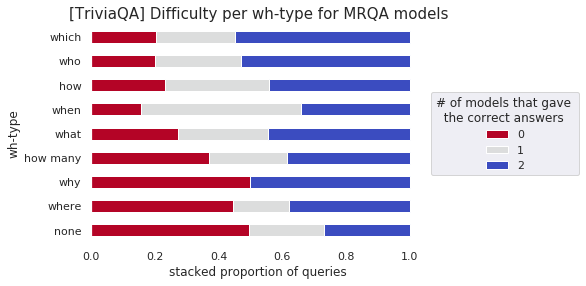

In [243]:
import pandas as pd
import seaborn as sns
import matplotlib
sns.set()

df = pd.DataFrame(ll, columns=['0', '1', '2'], 
                  index=tmp.index)
#df['unsolvable'] = -df['unsolvable']
ax = df.plot(title = '[TriviaQA] Difficulty per wh-type for MRQA models_triviaQA', kind='barh', stacked=True, colormap='coolwarm_r')
ax.set_facecolor("w")
matplotlib.pyplot.ylabel('wh-type')
matplotlib.pyplot.xlabel('stacked proportion of queries')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="# of models that gave \n  the correct answers")
ax.set_title('[TriviaQA] Difficulty per wh-type for MRQA models', fontsize=15)

In [41]:
tmp.index

Index(['None', 'where', 'when', 'how many', 'what', 'All', 'how', 'which',
       'who'],
      dtype='object', name='whtype')

In [42]:
tmp

,unsolvable,solvable,RowTotal
whtype,,,
None,0.481481,0.518519,1.0
where,0.445455,0.554545,1.0
when,0.387755,0.612245,1.0
how many,0.370968,0.629032,1.0
what,0.270657,0.729343,1.0
All,0.236957,0.763043,1.0
how,0.229508,0.770492,1.0
which,0.202899,0.797101,1.0
who,0.202439,0.797561,1.0


In [319]:
ll

[(0.48148148148148145, 0.5185185185185185),
 (0.44545454545454544, 0.5545454545454546),
 (0.3877551020408163, 0.6122448979591837),
 (0.3709677419354839, 0.6290322580645161),
 (0.27065736320235034, 0.7293426367976497),
 (0.23695733767046165, 0.7630426623295383),
 (0.22950819672131148, 0.7704918032786885),
 (0.2028985507246377, 0.7971014492753623),
 (0.20243902439024392, 0.7975609756097561)]

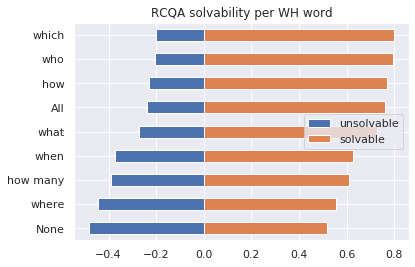

In [320]:
import pandas as pd
import seaborn as sns
sns.set()

df = pd.DataFrame([(0.48148148148148145, 0.5185185185185185),
 (0.44545454545454544, 0.5545454545454546),
 (0.3877551020408163, 0.6122448979591837),
 (0.3709677419354839, 0.6290322580645161),
 (0.27065736320235034, 0.7293426367976497),
 (0.23695733767046165, 0.7630426623295383),
 (0.22950819672131148, 0.7704918032786885),
 (0.2028985507246377, 0.7971014492753623),
 (0.20243902439024392, 0.7975609756097561)], columns=['unsolvable', 'solvable'], 
                  index=['None', 'where', 'how many', 'when', 'what', 'All', 'how', 'who',
       'which'])
df['unsolvable'] = -df['unsolvable']
df.plot(title = 'RCQA solvability per WH word', kind='barh', stacked=True);

## LAT type wrong probability

In [37]:
def PosTagger(sentence):    
    '''
    POS Tagger
    
    @return the tuple of token and POS tag in sentence
    '''
    doc = nlp(sentence)
    poslist = []

    for token in doc:
        poslist.append((token.text, token.tag_, token.pos_, token.lemma_))
    
    return poslist

In [61]:
def detailAnsType(question):
    '''
    Find detail answer type
    
    @return the detail answer type
    '''
    st = False
    ans = ''
    PTs = PosTagger(question)
    
    #print (PTs)
    
    for idx, w in enumerate(PTs):
        if w[0].lower() == 'what' or w[0].lower() == 'which':
            st = True
            continue
        if st == True and w[0].lower() == 'did': break
#        if st == True and (w[0].lower() == 'did' or w[0].lower() == 'does' or w[0].lower() == 'do' or w[0].lower() == 'can'): break
#        if st == True and (w[2] == 'VERB' and w[3].lower() != 'be'): break
        if st == True and (w[1] == 'NN' or w[1] == 'NNP' or w[1] == 'NNS'):
            if 'kind' in w[0].lower() or 'name' in w[0].lower() or 'type' in w[0].lower() or (idx < len(PTs)-1 and "\'s" in PTs[idx+1][0].lower()):
                continue
            
            for j in range(idx, len(PTs)):
                if '’s' in PTs[j][0].lower():
                    ans = ''
                    break
                if not (PTs[j][1] == 'NN' or PTs[j][1] == 'NNP' or PTs[j][1] == 'NNS'):
                    if "\'s" in PTs[j][0].lower():
                        ans = ''
                        break
                    else: return (ans, PTs[j-1][0])
                ans += PTs[j][0]+' '
                
    
    return ("None","None")

In [62]:
detailAnsType('In the novel ‘Jane Eyre’ by Charlotte Bronte, what is the name of Mr Rochester’s first wife?')

('wife ', 'wife')

In [63]:
lat_group = Counter()
lat_list = []
for instance in tqdm_notebook(dev):
    
    question = clearquestion(instance['Question'])
    lat_d, lat_s = detailAnsType(question)
    lat_list.append(lat_s)
    
    if lat_s == '’s':
        print(question)
    
    lat_group[lat_s] += 1

In [64]:
qid_dict2 = {'qid': qid_list, 'whtype': whtype_list, 'lattype': lat_list, 'RC_solvable_count': RC_solvable_count}

In [65]:
len(set(lat_list))

1600

In [66]:
df2 = pd.DataFrame(qid_dict2)

In [43]:
df2

,qid,whtype,lattype,RC_solvable_count
0,tc_33,which,musical,0
1,tc_40,who,None,0
2,tc_49,who,None,1
3,tc_56,what,None,0
4,tc_106,which,actress,2
...,...,...,...,...
7988,qg_4592,who,None,1
7989,qg_4604,what,US,1
7990,qg_4615,who,None,1
7991,qg_4628,what,parson,0


In [67]:
df_filter = df2.loc[(df2['whtype'] == 'what') | (df2['whtype'] == 'which')]

In [68]:
df_filter = df_filter.drop(columns=['whtype'])

In [46]:
counts = df_filter.groupby(['lattype','RC_solvable_count']).count()

In [69]:
counts_count = df_filter.groupby(['lattype','RC_solvable_count']).count()

In [48]:
counts_count

qid
lattype   RC_solvable_count     
.         0                    1
Admiral   0                    1
          2                    1
Adventure 2                    1
Aircraft  1                    1
...                          ...
year      2                   48
years     0                    1
youth     2                    1
zoophobia 0                    1
‘S        2                    1

[1966 rows x 1 columns]

In [329]:
counts = counts.unstack(level=1)
counts.columns = counts.columns.droplevel(level=0)
print (counts)

RC_solvable  False  True 
lattype                  
.              1.0    NaN
/songwriter    NaN    1.0
1970s          NaN    1.0
A              NaN    1.0
Act            NaN    1.0
...            ...    ...
yogurt         NaN    1.0
youth          NaN    1.0
’              NaN    3.0
’s             5.0   10.0
“              NaN    1.0

[1582 rows x 2 columns]


In [70]:
counts_count = counts_count.unstack(level=1)
counts_count.columns = counts_count.columns.droplevel(level=0)
print (counts_count)

RC_solvable_count    0   1    2
lattype                        
%                  NaN NaN  1.0
.                  1.0 NaN  NaN
1940s              NaN NaN  1.0
A                  1.0 NaN  NaN
Act                NaN NaN  1.0
...                ...  ..  ...
years              1.0 NaN  NaN
yogurt             NaN NaN  1.0
youth              NaN NaN  1.0
zoophobia          1.0 NaN  NaN
‘S                 NaN NaN  1.0

[1566 rows x 3 columns]


In [91]:
counts = counts.fillna(0)


In [71]:
counts_count = counts_count.fillna(0)
counts_count['Total'] = counts_count.sum(axis=1)

In [61]:
counts['Total'] = counts.sum(axis=1)

In [72]:
#counts1 = counts1.sort_values(['Total'], ascending=[0])
#counts2 = counts2.sort_values(['Total'], ascending=[0])
counts_count = counts_count.sort_values(['Total'], ascending=[0])
#counts_xlnet = counts_xlnet.sort_values(['Total'], ascending=[0])

In [52]:
counts_count

RC_solvable_count,0,1,2,Total
lattype,,,,
None,254.0,245.0,364.0,863.0
country,67.0,92.0,290.0,449.0
city,33.0,44.0,169.0,246.0
film,13.0,31.0,76.0,120.0
year,16.0,28.0,48.0,92.0
...,...,...,...,...
consist,0.0,1.0,0.0,1.0
console,0.0,0.0,1.0,1.0
consort,0.0,0.0,1.0,1.0


In [67]:
result = counts.sort_values(['Total'], ascending=[0])

NameError: name 'counts' is not defined

In [73]:
result_sample_count = counts_count.head(100)

In [69]:
result_sample_count

qid  whtype  Total
lattype    RC_solvable_count                    
None       2                  364     364    728
country    2                  290     290    580
None       0                  254     254    508
           1                  245     245    490
city       2                  169     169    338
...                           ...     ...    ...
creatures  2                   10      10     20
team       1                   10      10     20
movie      1                   10      10     20
instrument 0                   10      10     20
singer     1                   10      10     20

[100 rows x 3 columns]

In [348]:
result_sample = result.head(100)

In [74]:
for i in range(3):
    result_sample_count[i] = result_sample_count[i]/result_sample_count['Total']

/home/doyeon/anaconda3/envs/qa_analysis/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [349]:
result_sample['ratio'] = result_sample[False]/result_sample['Total']

/home/doyeon/anaconda3/envs/kcc/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [351]:
result_sample = result_sample.sort_values(['ratio'], ascending=[0])

In [352]:
result_sample.columns = ['False','True','Total','Ratio']

In [68]:
result_sample_count

RC_solvable_count,0,1,2,Total
lattype,,,,
country,0.148889,0.204444,0.646667,450.0
None,0.254848,0.301939,0.443213,361.0
city,0.136546,0.176707,0.686747,249.0
film,0.136364,0.250000,0.613636,132.0
year,0.173913,0.304348,0.521739,92.0
...,...,...,...,...
century,0.555556,0.111111,0.333333,9.0
duo,0.111111,0.222222,0.666667,9.0
fish,0.333333,0.222222,0.444444,9.0


In [75]:
## 1, 0.5

import numpy as np

urgent_list = []
wrong_score_list = []
freq_list = []
freq_log_list = []
for lat, instance in result_sample_count.iterrows():    
    wrong_score = instance[0]+0.5*instance[1]
    freq_log = np.log(instance['Total'])
    freq = instance['Total']
    
    wrong_score_list.append(wrong_score)
    freq_list.append(int(freq))
    freq_log_list.append(freq_log)
    
    urgent = wrong_score*freq
    urgent_list.append(urgent)

result_sample_count['freq'] = freq_list
result_sample_count['freq_log'] = freq_log_list
result_sample_count['wrong_score'] = wrong_score_list
result_sample_count['urgent'] = urgent_list

/home/doyeon/anaconda3/envs/qa_analysis/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/doyeon/anaconda3/envs/qa_analysis/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/doyeon/anaconda3/envs/qa_analysis/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [100]:
result_sample_count = result_sample_count.sort_values(['urgent'], ascending=[0])

In [76]:
result_sample_count.columns = ['0','1','2','Total','freq','freq_log','wrong_score','urgent']

In [57]:
result_sample_count[:10]

,0,1,2,Total,freq,freq_log,wrong_score,urgent
lattype,,,,,,,,
None,0.294322,0.283893,0.421784,863.0,863,6.760415,0.436269,376.5
country,0.149220,0.204900,0.645880,449.0,449,6.107023,0.251670,113.0
city,0.134146,0.178862,0.686992,246.0,246,5.505332,0.223577,55.0
film,0.108333,0.258333,0.633333,120.0,120,4.787492,0.237500,28.5
year,0.173913,0.304348,0.521739,92.0,92,4.521789,0.326087,30.0
state,0.200000,0.122222,0.677778,90.0,90,4.499810,0.261111,23.5
sport,0.229730,0.270270,0.500000,74.0,74,4.304065,0.364865,27.0
group,0.098592,0.239437,0.661972,71.0,71,4.262680,0.218310,15.5
character,0.265625,0.203125,0.531250,64.0,64,4.158883,0.367188,23.5


In [77]:
result_sample_count['score'] = result_sample_count['2']-result_sample_count['0']

/home/doyeon/anaconda3/envs/qa_analysis/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [78]:
result_sample_count = result_sample_count.sort_values(['score'], ascending=[1])

Text(0.5, 1.0, 'Difficulty per LAT type for MRQA models')

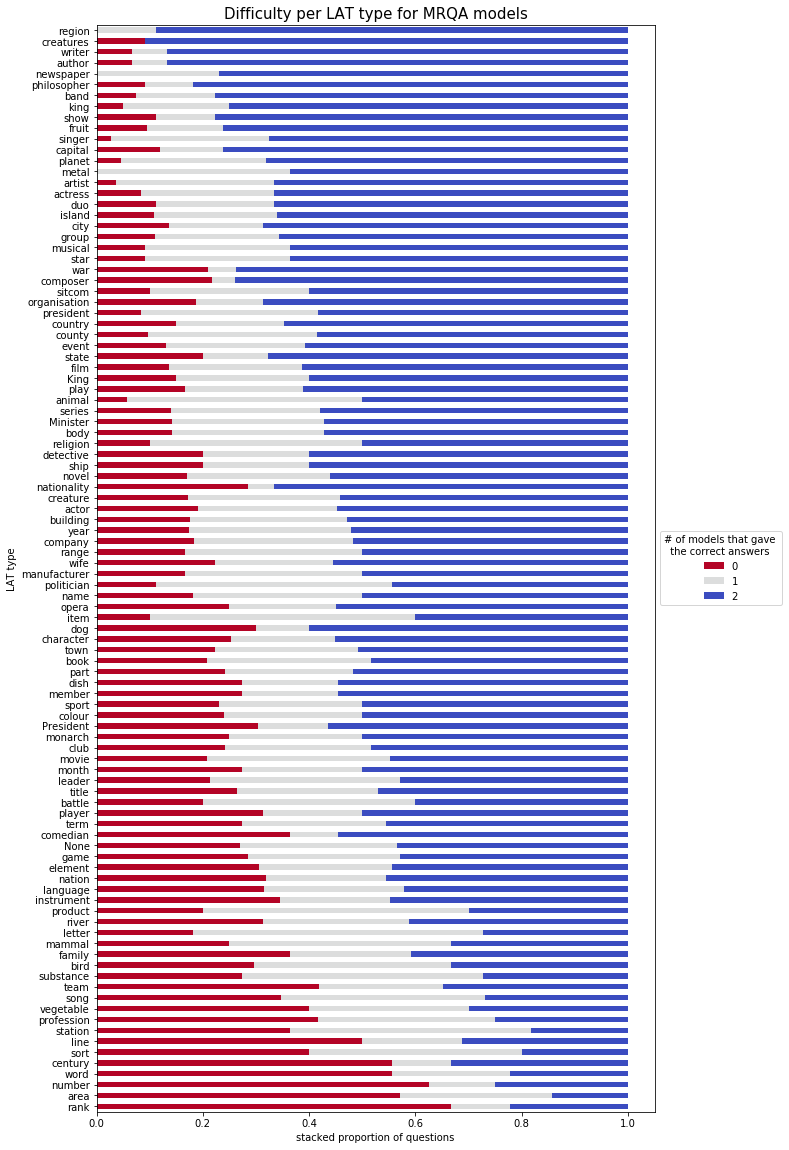

In [79]:
import matplotlib

result_sample_count = result_sample_count[['0','1','2']]
#result_sample_alo['False'] = -result_sample_alo['False']
ax = result_sample_count.plot(figsize=(10,20), kind='barh', stacked=True , colormap='coolwarm_r')

ax.set_facecolor("w")
matplotlib.pyplot.ylabel('LAT type')
matplotlib.pyplot.xlabel('stacked proportion of questions')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="# of models that gave \n  the correct answers")
ax.set_title('Difficulty per LAT type for MRQA models', fontsize=15)

In [188]:
sum(1 for i in lat_group.values() if i >= 50)

17

In [191]:
len(result_sample)

50

In [341]:
result_sample['False'] /= result_sample['Total']
result_sample['True'] /= result_sample['Total']

/home/doyeon/anaconda3/envs/kcc/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


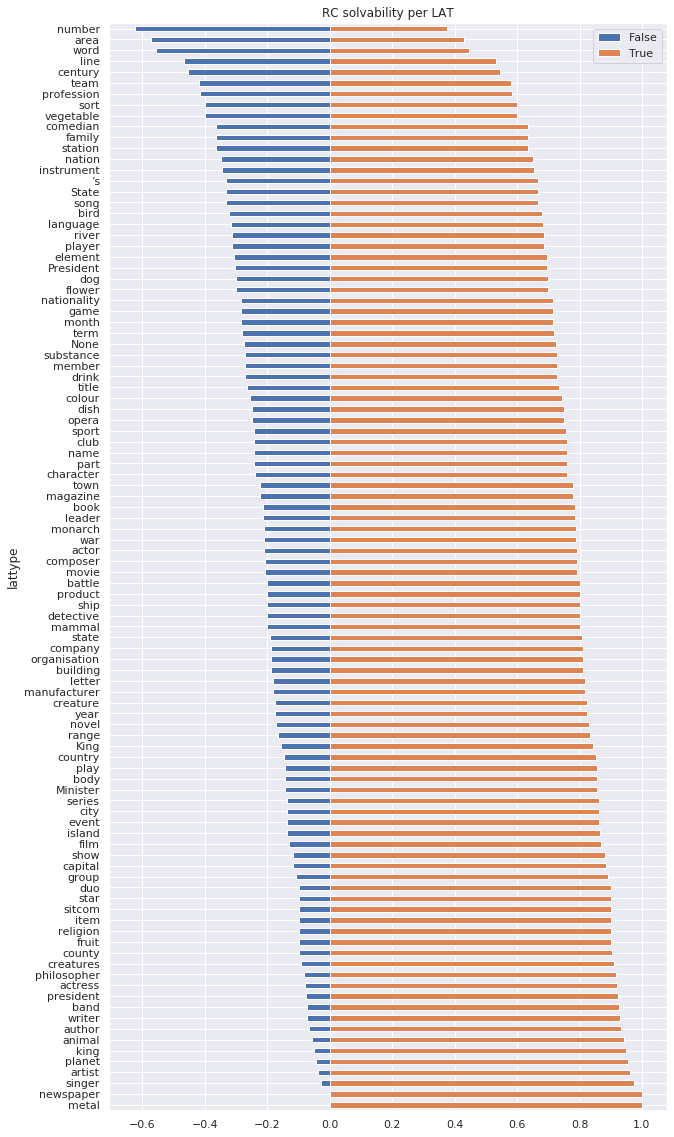

In [342]:
result_sample = result_sample[['False','True']]
result_sample['False'] = -result_sample['False']
result_sample.plot(figsize=(10,20), kind='barh', stacked=True ,title = 'RC solvability per LAT')

In [203]:
result_sample_count = result_sample_count.sort_values([0,2,1], ascending=[0,1,1])

Text(0.5, 1.0, 'Difficulty per lat type for MRQA models_triviaQA')

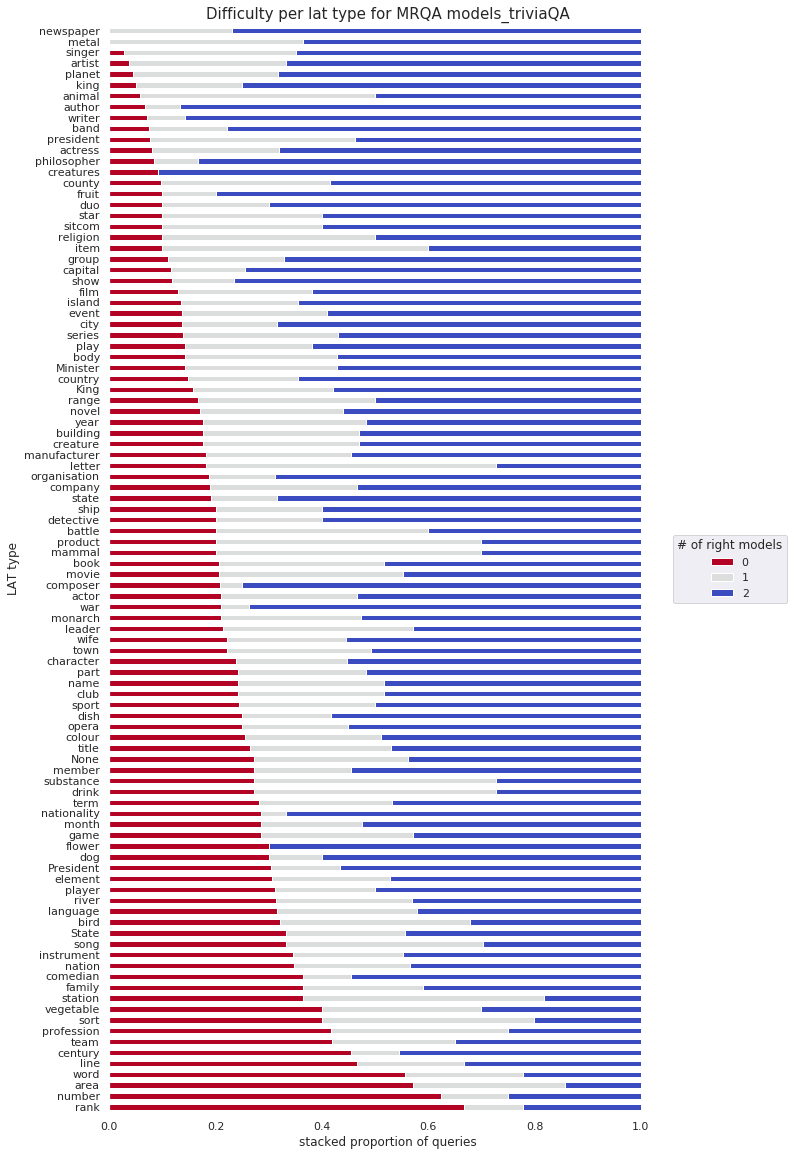

In [204]:
result_sample_count = result_sample_count[[0,1,2]]
#result_sample_alo['False'] = -result_sample_alo['False']
ax = result_sample_count.plot(figsize=(10,20), kind='barh', stacked=True , colormap='coolwarm_r')

ax.set_facecolor("w")
matplotlib.pyplot.ylabel('LAT type')
matplotlib.pyplot.xlabel('stacked proportion of queries')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="# of right models")
ax.set_title('Difficulty per lat type for MRQA models_triviaQA', fontsize=15)

In [214]:
#new & considering 4 models

qid_list = []
bidaf_solvable_list = []
bert_solvable_list = []
docqa_solvable_list = []
xlnet_solvable_list = []
lat_list = []
whtype_list = []

lat_list = []
for instance in tqdm_notebook(dev):
    
    question = clearquestion(instance['Question'])
    
    whtype = findWHword(question)    
    whtype_list.append(whtype)
    
    lat_d, lat_s = detailAnsType(question)
    lat_list.append(lat_s)
    
    qid_list.append(instance['QuestionId'])

    bert_solvable = False if instance['QuestionId'] in wrong_bert else True
    docqa_solvable = False if instance['QuestionId'] in wrong_docqa else True
                  
    bert_solvable_list.append(bert_solvable)
    docqa_solvable_list.append(docqa_solvable)

    
qid_dict = {'qid': qid_list, 'whtype':whtype_list, 'lattype': lat_list, 'bert_solvable': bert_solvable_list, 'docqa_solvable': docqa_solvable_list}

In [215]:
import pandas as pd
df = pd.DataFrame(qid_dict)

In [216]:
qid_dict

{'qid': ['tc_33',
  'tc_40',
  'tc_49',
  'tc_56',
  'tc_106',
  'tc_137',
  'tc_217',
  'tc_219',
  'tc_241',
  'tc_261',
  'tc_267',
  'tc_276',
  'tc_280',
  'tc_282',
  'tc_288',
  'tc_298',
  'tc_304',
  'tc_316',
  'tc_349',
  'tc_379',
  'tc_397',
  'tc_455',
  'tc_510',
  'tc_515',
  'tc_517',
  'tc_538',
  'tc_540',
  'tc_543',
  'tc_559',
  'tc_561',
  'tc_564',
  'tc_586',
  'tc_604',
  'tc_626',
  'tc_635',
  'tc_653',
  'tc_657',
  'tc_664',
  'tc_665',
  'tc_672',
  'tc_678',
  'tc_687',
  'tc_704',
  'tc_715',
  'tc_719',
  'tc_723',
  'tc_731',
  'tc_759',
  'tc_783',
  'tc_812',
  'tc_827',
  'tc_847',
  'tc_866',
  'tc_875',
  'tc_881',
  'tc_886',
  'tc_888',
  'tc_905',
  'tc_938',
  'tc_945',
  'tc_954',
  'tc_955',
  'tc_962',
  'tc_1007',
  'tc_1008',
  'tc_1009',
  'tc_1020',
  'tc_1023',
  'tc_1028',
  'tc_1029',
  'tc_1068',
  'tc_1069',
  'tc_1070',
  'tc_1098',
  'tc_1114',
  'tc_1115',
  'tc_1120',
  'tc_1123',
  'tc_1124',
  'tc_1128',
  'tc_1131',
  'tc_1

In [222]:
def get_at(question):
    wh_word = findWHword(question)
    if wh_word == 'None':
        return 'None'
    elif wh_word == 'what' or wh_word == 'which':
        return detailAnsType(question)[1] #we don't need the detailed ans type
    else:
        return wh_word
assert get_at('Where was Obama born?') == "where"
assert get_at('When was Obama born?') == "when"
assert get_at('In which country was Obama born?') == 'country'
assert get_at('What policy did he follow?') == 'policy'
assert get_at('What to do in Seoul') == 'None'

In [224]:
def increment_frequency(d, k):
    if k in d:
        d[k] = d[k]+1
    else:
        d[k] = 1

In [225]:
dict_freq_lat = {}

for instance in tqdm_notebook(train['Data']):
    question = clearquestion(instance['Question'])
    at = get_at(question)
    increment_frequency(dict_freq_lat, at)

In [226]:
df

df_filter = df.loc[(df['whtype'] == 'what') | (df['whtype'] == 'which')]

df_bert = df_filter[['qid','lattype','bert_solvable']]
df_docqa = df_filter[['qid','lattype','docqa_solvable']]

count_bert = df_bert.groupby(['lattype','bert_solvable']).count()
count_docqa = df_docqa.groupby(['lattype','docqa_solvable']).count()


count_bert = count_bert.unstack(level=1)
count_bert.columns = count_bert.columns.droplevel(level=0)
print (count_bert)

count_docqa = count_docqa.unstack(level=1)
count_docqa.columns = count_docqa.columns.droplevel(level=0)
print (count_docqa)


count_bert = count_bert.fillna(0)
count_bert['Total'] = count_bert.sum(axis=1)

count_docqa = count_docqa.fillna(0)
count_docqa['Total'] = count_docqa.sum(axis=1)

result_bert = count_bert
result_docqa = count_docqa

result_bert['ratio'] = result_bert[True]/result_bert['Total']
result_docqa['ratio'] = result_docqa[True]/result_docqa['Total']

average_correct_rate = dict()
dot = []
for lat in result_bert.index:
    summa = (result_bert.loc[lat, 'ratio'] + result_docqa.loc[lat, 'ratio'])
    avg = summa*1.0/2
    
    if lat in dict_freq_lat:
        dot.append((dict_freq_lat[lat], avg))

bert_solvable  False  True 
lattype                    
.                1.0    NaN
/songwriter      NaN    1.0
1970s            NaN    1.0
A                NaN    1.0
Act              NaN    1.0
...              ...    ...
years            1.0    NaN
yogurt           NaN    1.0
youth            NaN    1.0
’                NaN    3.0
“                1.0    NaN

[1558 rows x 2 columns]
docqa_solvable  False  True 
lattype                     
.                 1.0    NaN
/songwriter       NaN    1.0
1970s             NaN    1.0
A                 NaN    1.0
Act               NaN    1.0
...               ...    ...
years             1.0    NaN
yogurt            NaN    1.0
youth             NaN    1.0
’                 1.0    2.0
“                 NaN    1.0

[1558 rows x 2 columns]


Text(0.5, 1.0, 'Correlation between the Number of Dataset and Accuracy in LAT Anaylsis_triviaQA')

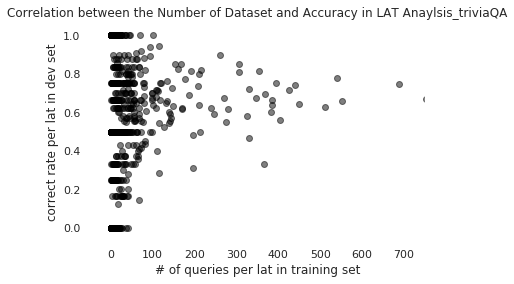

In [227]:
import matplotlib

fig = plt.figure(1)
ax = fig.add_subplot(111, facecolor='white')

x,y = zip(*dot)
plt.scatter(x, y, color='black', alpha= 0.5)
plt.xlim(-50, 750)
np.corrcoef(x, y)
#ax.set_facecolor("w")
matplotlib.pyplot.ylabel('correct rate per lat in dev set')
matplotlib.pyplot.xlabel('# of queries per lat in training set')
plt.title('Correlation between the Number of Dataset and Accuracy in LAT Anaylsis_triviaQA')

In [228]:
import numpy as np
np.corrcoef(x, y)

array([[1.        , 0.04064191],
       [0.04064191, 1.        ]])

In [173]:
pd.DataFrame(rand(10, 4))

,0,1,2,3
0,0.070429,0.314044,0.198377,0.046965
1,0.749975,0.313324,0.588196,0.009443
2,0.048844,0.023699,0.762604,0.092510
3,0.564028,0.023477,0.137801,0.141642
4,0.378162,0.212360,0.256653,0.705599
5,0.041651,0.066077,0.120181,0.473346
6,0.256582,0.133719,0.114964,0.538792
7,0.220245,0.159481,0.318749,0.242615
8,0.503184,0.947943,0.611468,0.419353
9,0.440137,0.689202,0.118517,0.299765


In [237]:
PosTagger("a,b,c,d or e is alphabet")

[('a', 'DT'),
 (',', ','),
 ('b', 'NN'),
 (',', ','),
 ('c', 'NN'),
 (',', ','),
 ('d', 'NN'),
 ('or', 'CC'),
 ('e', 'NN'),
 ('is', 'VBZ'),
 ('alphabet', 'JJ')]

## NN list check

In [239]:
entity_list_qid = []
for instance in tqdm_notebook(dev):
    
    question = clearquestion(instance['Question'])
    pos_list = PosTagger(question)
    
    posstr = ""
    for word, pos in pos_list:
        posstr += pos
    
    if ('NNCCNN' in posstr) or ('NN,NN' in posstr): 
        entity_list_qid.append(instance['QuestionId'])

In [244]:
len(set(entity_list_qid) & rc_wrong) / len(set(entity_list_qid))

0.5345345345345346

In [358]:
 len(set(entity_list_qid))

333